# Q1: Implementing a Basic Autoencoder

## a. Import Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

## b. Load and Preprocess the Dataset

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images to 784-dimensional vectors (28x28 = 784)
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## c. Define the Autoencoder Model

In [ ]:
# Define the encoder
input_img = tf.keras.Input(shape=(784,))
encoded = layers.Dense(32, activation='relu')(input_img)
#encoded = layers.Dense(16, activation='relu')(input_img)
#encoded = layers.Dense(64, activation='relu')(input_img)

# Define the decoder
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = models.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


## d. Train the Model

In [ ]:
# Train the autoencoder
autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3797 - val_loss: 0.1884
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1790 - val_loss: 0.1521
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1477 - val_loss: 0.1327
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1309 - val_loss: 0.1213
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1202 - val_loss: 0.1128
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1126 - val_loss: 0.1075
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1078 - val_loss: 0.1032
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1036 - val_loss: 0.1001
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1008 - val_loss: 0.0977
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0985 - val_loss: 0.0959
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0967 - val_loss: 0.0948
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

## e. Visualizing Reconstruction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


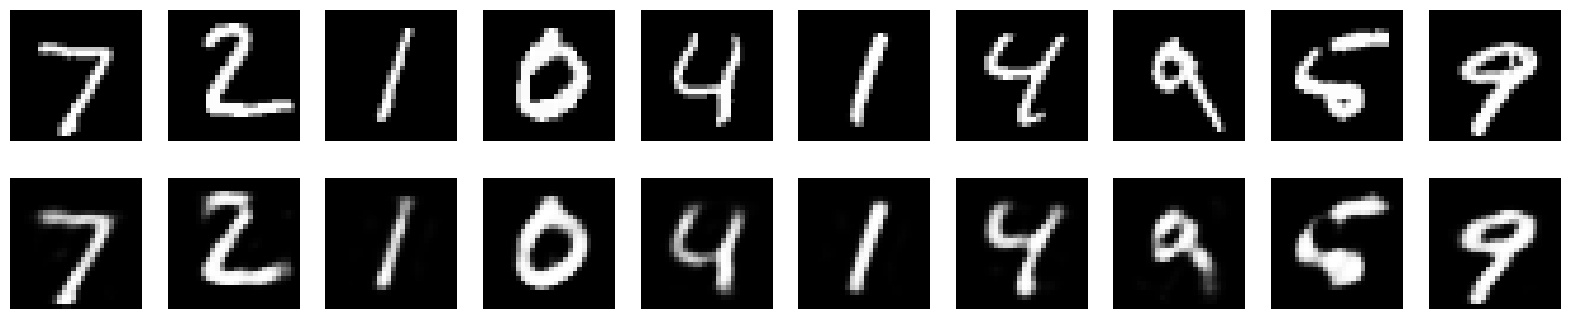

In [ ]:
# Predict the test images using the trained autoencoder
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstructed images
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


## f. Modify Latent Dimension Size (Experimentation)

##For latent dimension size = 16
encoded = layers.Dense(16, activation='relu')(input_img)

##For latent dimension size = 64
encoded = layers.Dense(64, activation='relu')(input_img)

**Observation**:

Latent Size = 16: Reconstruction will likely be more blurry and less accurate.

Latent Size = 32 (default): Good balance of compression and reconstruction quality.

Latent Size = 64: Likely to have the best reconstruction quality, but with reduced compression.

# Q2: Implementing a Denoising Autoencoder

## Step 1: Modify the Data Preprocessing Step

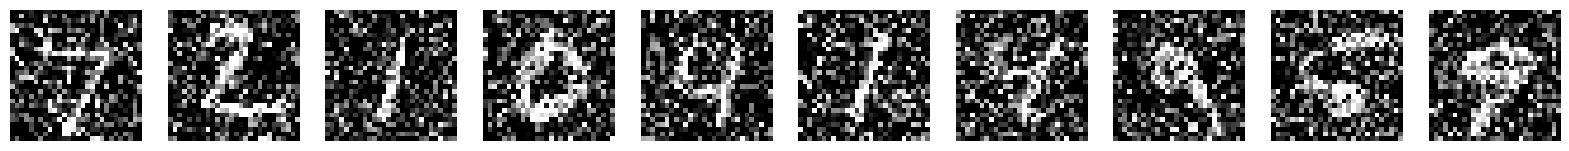

In [ ]:
import numpy as np

# Adding Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clipping the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Visualize some of the noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


## Step 2: Define the Denoising Autoencoder Model

In [ ]:
# Define the encoder
input_img = tf.keras.Input(shape=(784,))
encoded = layers.Dense(32, activation='relu')(input_img)

# Define the decoder
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Build the autoencoder model
denoising_autoencoder = models.Model(input_img, decoded)

# Compile the model
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


## Step 3: Train the Model

In [ ]:
denoising_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3681 - val_loss: 0.2153
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2074 - val_loss: 0.1838
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1801 - val_loss: 0.1650
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1629 - val_loss: 0.1507
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1495 - val_loss: 0.1421
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1417 - val_loss: 0.1369
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1374 - val_loss: 0.1333
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1340 - val_loss: 0.1308
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1317 - val_loss: 0.1294
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1305 - val_loss: 0.1286
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1296 - val_loss: 0.1281
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

## Step 4: Visualize the Denoising Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


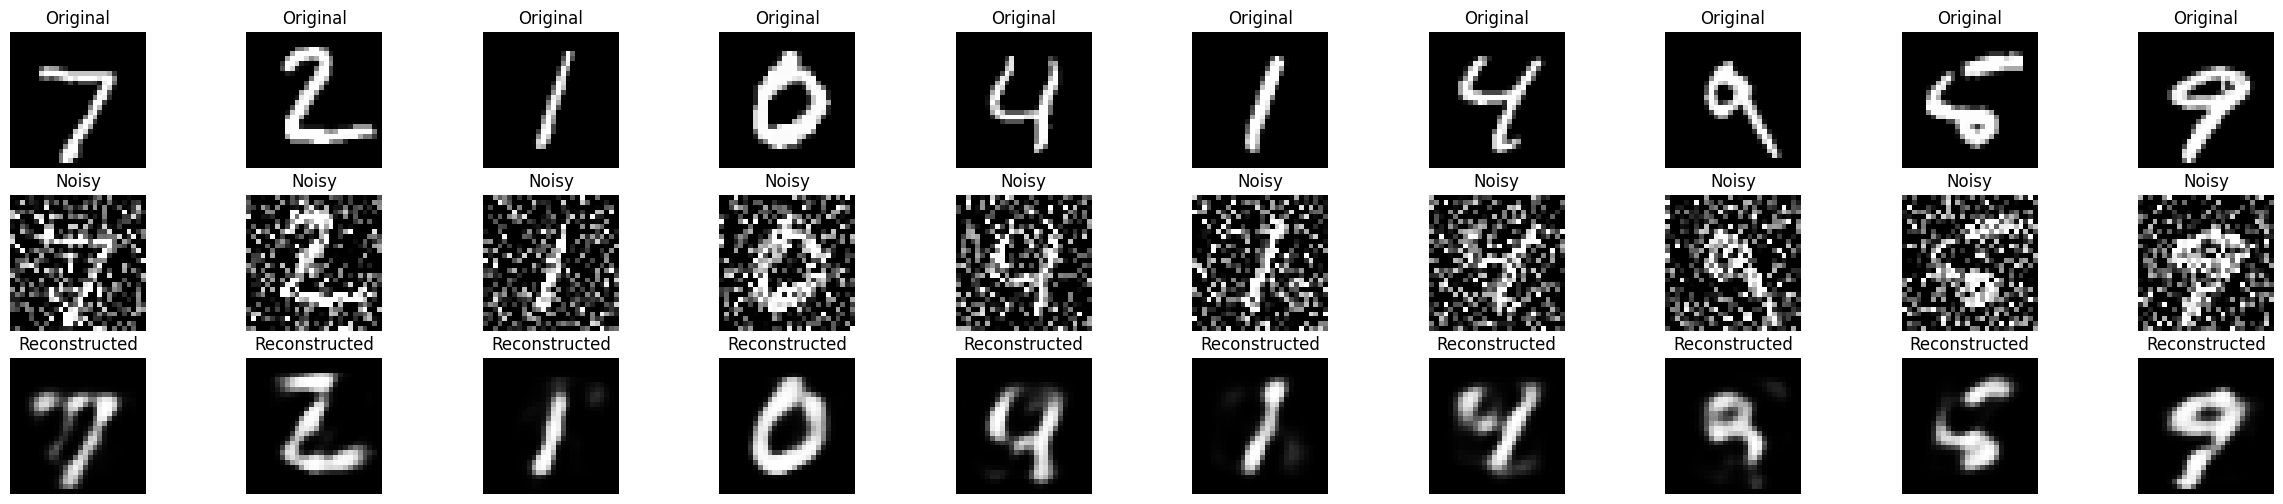

In [ ]:
# Predict the test images using the trained denoising autoencoder
decoded_imgs = denoising_autoencoder.predict(x_test_noisy)

# Plot original, noisy, and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(30, 6))
for i in range(n):
    # Display original images
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display noisy images
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display reconstructed images
    plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()


# **Observations**

The reconstructed images are significantly cleaned compared to the noisy ones.

The model is effectively learning to remove noise and restore the original digit shapes.

Some details are slightly blurred, but the main structure of the digits is preserved well.

# Q4: Sentiment Classification Using RNN

## Step 1: Import Necessary Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix, classification_report


# Step 2: Load and Preprocess the Dataset

In [ ]:
# Load the dataset (only keep the top 10,000 most common words)
max_features = 10000
maxlen = 200  # Cut reviews after this number of words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Testing samples: 25000


## Step 3: Build the LSTM Model

In [ ]:
model = tf.keras.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(128),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Step 4: Train the Model

In [ ]:
epochs = 10
batch_size = 64

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.6915 - loss: 0.5569 - val_accuracy: 0.7880 - val_loss: 0.4494
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8860 - loss: 0.2840 - val_accuracy: 0.8652 - val_loss: 0.3160
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9353 - loss: 0.1774 - val_accuracy: 0.8534 - val_loss: 0.3377
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9483 - loss: 0.1460 - val_accuracy: 0.8648 - val_loss: 0.3548
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9614 - loss: 0.1058 - val_accuracy: 0.8560 - val_loss: 0.4743
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9712 - loss: 0.0885 - val_accuracy: 0.8578 - val_loss: 0.4675
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9799 - loss: 0.0604 - val_accuracy: 0.8556 - val_loss: 0.4619
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9808 - loss: 0.0582 - val_a

## Step 5: Evaluate the Model

In [ ]:
# Evaluate on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8348 - loss: 0.6969
Test Accuracy: 0.8361


## Step 6: Generate Classification Report and Confusion Matrix

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step
Classification Report:

              precision    recall  f1-score   support

    Negative       0.89      0.76      0.82     12500
    Positive       0.79      0.91      0.85     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



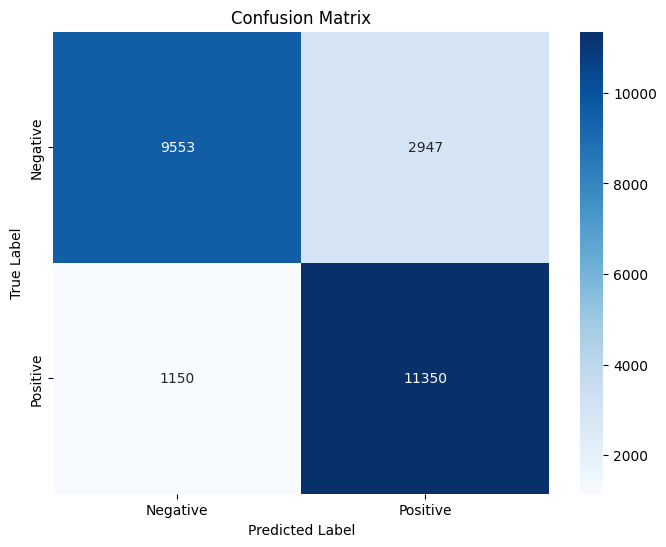

In [ ]:
# Generate predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Generate classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
